
# **Assignment - 3: Improving Graphs**

---
Course website: [SHALA-2020](https://shala2020.github.io/)

This assignment will get you familiarized with improving plots/graphs in Python. 

---
## Part 1 - Importing packages and loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

*You are free to use any other popular libraries*. 

In [0]:
# Load the libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```train``` and ```movies``` respectively. 
* Print the first ten rows of ```train``` and last ten rows of ```movies```. 

In [143]:
# Load train.csv and movies.csv 
url_train = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv"
train = pd.read_csv(url_train)

# Print the first ten rows of train
train.head(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


In [144]:
# Load movies.csv
url_movies = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/DataScience/L2/moviesData.csv"
movies = pd.read_csv(url_movies)

# Print the last ten rows of movies 
movies.head(10)

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover
5,6,Old Partner,Documentary,Documentary,78.0,Unrated,Shcalo Media Group,2009,1,15,2010.0,4.0,20.0,7.8,333,Fresh,91,Upright,86,no,no,no,no,no,no,Chung-ryoul Lee,Choi Won-kyun,Lee Sam-soon,Moo,NaN,NaN
6,7,Lady Jane,Feature Film,Drama,142.0,PG-13,Paramount Home Video,1986,1,1,2003.0,2.0,18.0,7.2,5016,Rotten,57,Upright,76,no,no,no,no,no,no,Trevor Nunn,Cary Elwes,John Wood,Michael Hordern,Jill Bennett II,Helena Bonham Carter
7,8,Mad Dog Time,Feature Film,Drama,93.0,R,MGM/United Artists,1996,11,8,2004.0,3.0,2.0,5.5,2272,Rotten,17,Spilled,47,no,no,yes,no,no,no,Larry Bishop,Richard Dreyfuss,Jeff Goldblum,Gabriel Byrne,Ellen Barkin,Diane Lane
8,9,Beauty Is Embarrassing,Documentary,Documentary,88.0,Unrated,Independent Pictures,2012,9,7,2013.0,1.0,21.0,7.5,880,Fresh,90,Upright,89,no,no,no,no,no,no,Neil Berkeley,Paul Reubens,Matt Groening,Todd Oldham,Jonathan Dayton,Cliff Benjamin
9,10,The Snowtown Murders,Feature Film,Drama,119.0,Unrated,IFC Films,2012,3,2,2012.0,8.0,14.0,6.6,12496,Certified Fresh,83,Upright,66,no,no,no,no,no,no,Justin Kurzel,Lucas Pittaway,Daniel Henshall,Louise Harris,Craig Coyne,Richard Green


---
## Part 2 - Drawing correlation and heatmap 
---

### Using the correlation matrix, peform the following:

* Find the correlation matrix for the ```movies```.  
* Draw a **heatmap** with the correlation matrix and display the values of correlation coefficients for each pair of features. Make sure the values are properly visible. You might want to adjust the figure size for this. 
* Create a ```mask``` to remove the duplicate values from the **heatmap**. 

                Unnamed: 0   runtime  ...  critics_score  audience_score
Unnamed: 0        1.000000 -0.045146  ...       0.003937        0.012582
runtime          -0.045146  1.000000  ...       0.169494        0.172237
thtr_rel_year    -0.000639 -0.124754  ...      -0.096445       -0.062610
thtr_rel_month    0.005468  0.215274  ...       0.047717        0.034901
thtr_rel_day      0.046227  0.033998  ...       0.023837        0.033812
dvd_rel_year     -0.000382 -0.088603  ...       0.009554       -0.073794
dvd_rel_month    -0.015944 -0.036916  ...       0.041502        0.070543
dvd_rel_day       0.024857  0.021001  ...      -0.024717        0.019294
imdb_rating       0.027596  0.261153  ...       0.770764        0.865149
imdb_num_votes    0.045508  0.342462  ...       0.200657        0.288328
critics_score     0.003937  0.169494  ...       1.000000        0.710695
audience_score    0.012582  0.172237  ...       0.710695        1.000000

[12 rows x 12 columns]


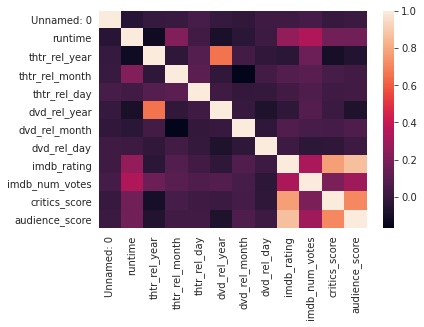

In [145]:
# Find out the correlation matrix 
print(movies.corr())
# Draw the heatmap 
sns.heatmap(movies.corr())

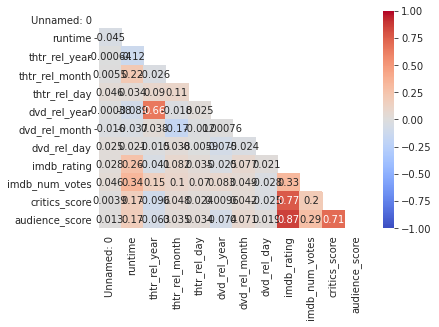

In [146]:
# Creating a mask for removing duplicates 
mask = np.zeros_like(movies.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(movies.corr(),vmin = -1, cmap='coolwarm', annot=True,  mask = mask)

---
## Part 3 - Drawing plots and customizing these 
---

### Using a histogram, peform the following:

* Draw a histogram of all the numeric features in ```train```. Please note that this can be done in a single command.  

* Find out whether there is any redundant features in ```train```, which can be dropped while building a model. 

['MonthlyIncome', 'ID']

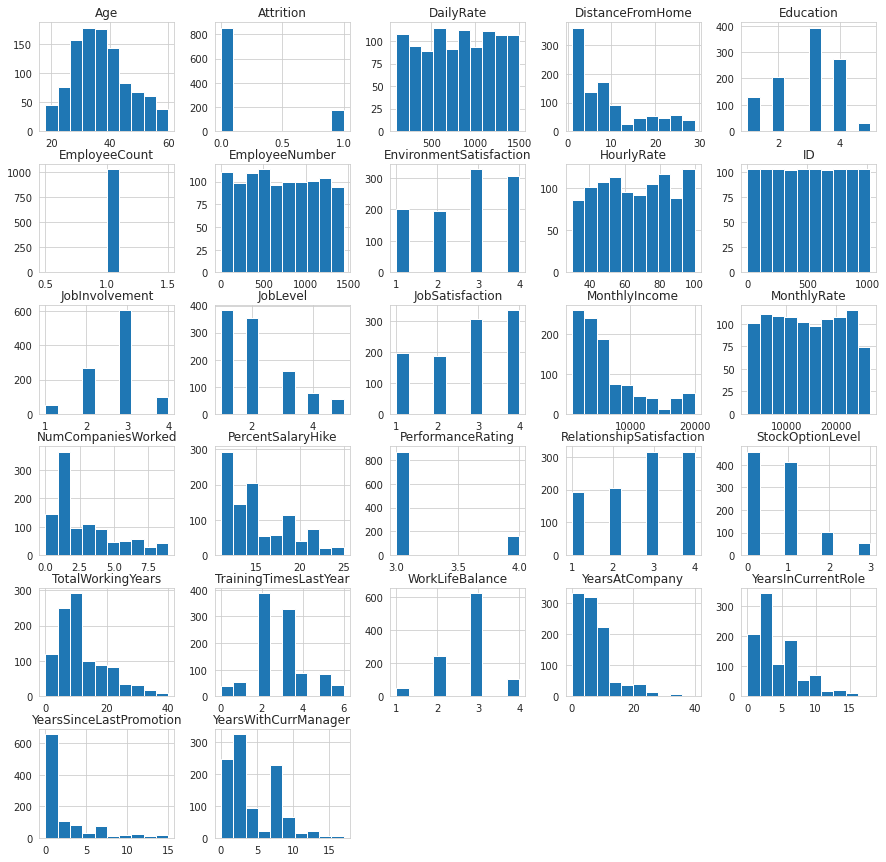

In [147]:
# Draw a histogram 
train.hist(figsize = (15,15))
# Find out the redundant features 
# Create correlation matrix
corr_matrix = train.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop
# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

'MonthlyIncome', 'ID' are redundant features to drop

### Using a scatter plot, perform the following:

* Draw a scatter plot between between ```imdb_rating``` and ```audience_score```, and also fit a regression line.
* Change the color of marker to red, size to 200, transparency to 0.3.    



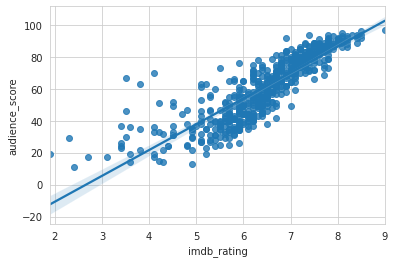

In [148]:
# Scatter plot to fit the regression line 
sns.regplot(x = "imdb_rating", 
            y = "audience_score",data=movies, fit_reg=True)

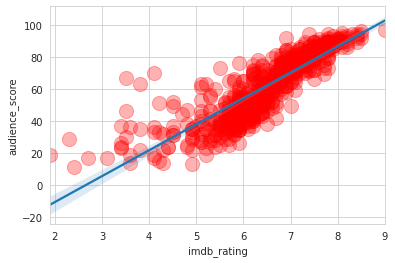

In [149]:
# Change marker of the scatter plot
sns.regplot(x = "imdb_rating", 
            y = "audience_score",data=movies, fit_reg=True, scatter_kws={'color':'red','alpha':0.3,'s':200})

### Using a scatter plot, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw a scatter plot between between ```petal_length``` and ```petal_width``` and color it according to the ```species```.
* Change the size of marker to 100 and place the legend in ```lower right```. 

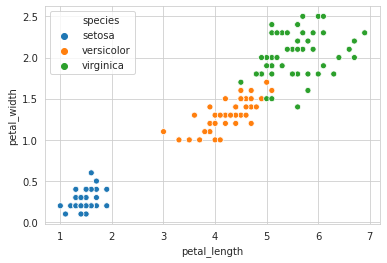

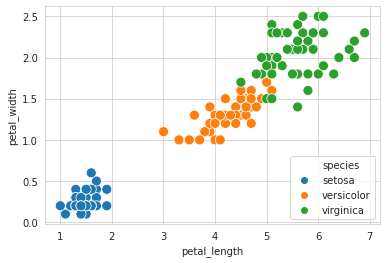

In [150]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.scatterplot(x="petal_length", y="petal_width", hue="species",  data=df)
plt.show()
# Move the legend to an empty part of the plot
sns.scatterplot(x="petal_length", y="petal_width", hue="species",  data=df, s=100, marker='o')
plt.legend(loc="lower right")
plt.show()

---
## Part 4 - Density Plots  
---

### Using density plots, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw the density plots for all the features ```sepal_width```, ```sepal_length```, ```petal_width```, and ```petal_length```. You can required to use subplots for plotting all the density plots. 
* Try drawing a [CDF](https://en.wikipedia.org/wiki/Cumulative_distribution_function) of these features. There is a [blog on medium](https://medium.com/@rishav.jnit/exploratory-data-analysis-eda-on-iris-dataset-using-python-cadd850c1fc6) on how to plot CDF. It will be covered in tutorial. 

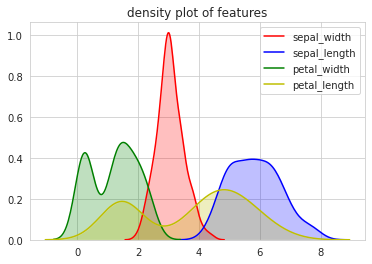

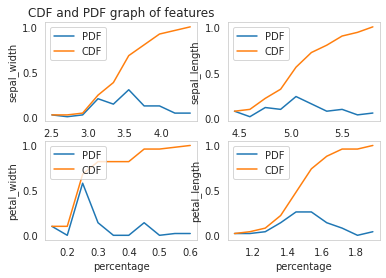

In [151]:
# library and dataset 
df = sns.load_dataset('iris')
plt.title('density plot of features')
p1=sns.kdeplot(df['sepal_width'], shade=True, color="r")
p2=sns.kdeplot(df['sepal_length'], shade=True, color="b")
p3=sns.kdeplot(df['petal_width'], shade=True, color="g")
p4=sns.kdeplot(df['petal_length'], shade=True, color="y")
plt.show()
f=['sepal_width','sepal_length','petal_width','petal_length']

iris_setosa = df.loc[df["species"] == "setosa"];
iris_virginica = df.loc[df["species"] == "virginica"];
iris_versicolor = df.loc[df["species"] == "versicolor"];

for i in range(4):
  if i==1:
    plt.title('CDF and PDF graph of features')
  counts, bin_edges = np.histogram(iris_setosa[f[i]], bins=10, density = True)
  pdf = counts/(sum(counts))
  cdf = np.cumsum(pdf)
  plt.subplot(2,2,i+1)
  plt.grid()
  plt.plot(bin_edges[1:],pdf)
  plt.plot(bin_edges[1:], cdf)
  plt.xlabel("percentage")
  plt.ylabel(f[i])
  plt.legend(['PDF','CDF'], loc='upper left')
  

### Using violin plot, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw the density plots of ```species``` versus ```sepal_length```.
* Assign each group a color like 

    * versicolor - green, 
    * setosa - blue,   
    * virginica - m

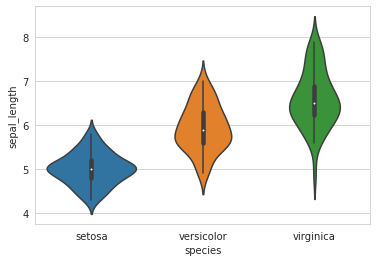

In [152]:
# Draw the normal violin plots 
sns.violinplot(x=df["species"], y=df["sepal_length"])

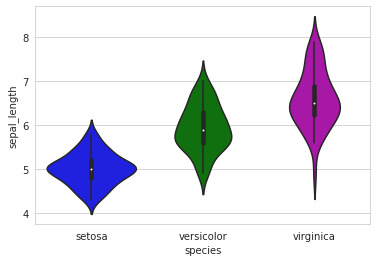

In [153]:
# Change the color of each group 
col= {"versicolor": "g", "setosa": "b", "virginica":"m"}
sns.violinplot(x="species", y="sepal_length", data=df, palette=col)
